# <center>Liver Disease Detection</center>

## Overview:

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.


## Dataset Information:

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

Indian Liver Patient Records - [Kaggle - Liver Disease Detection](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records)

### Independent Feature:
* Dataset: (Patient with liver disease, or no disease)
### Dependent Features:
* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio

### Training : Testing ::  564 : 394 :: 80 : 20

### Evaluation Metrics Considered:
* Accuracy, Precision, Recision, F1 Score, ROC AUC Curve

# 1. Importing Required Libraries
* NumPy: For numerical computations and array manipulation.
* Pandas: For data manipulation and analysis.
* Seaborn: For statistical data visualization.
* Matplotlib: For creating plots and visualizations.
* Scikit-learn: For machine learning algorithms and evaluation metrics.
* XGBoost: For Extreme gradient boosting machine learning.
* Catboost: For CatBoosting machine learning.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, ClassificationPreset, DataQualityPreset

# 2. Data Ingestion

In [2]:
df = pd.read_csv('Data/Liver.csv')

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# 3. Data Exploration

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
df["Dataset"].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

# 4. Data Preprocessing

### 4.1 Checking Data Distribution

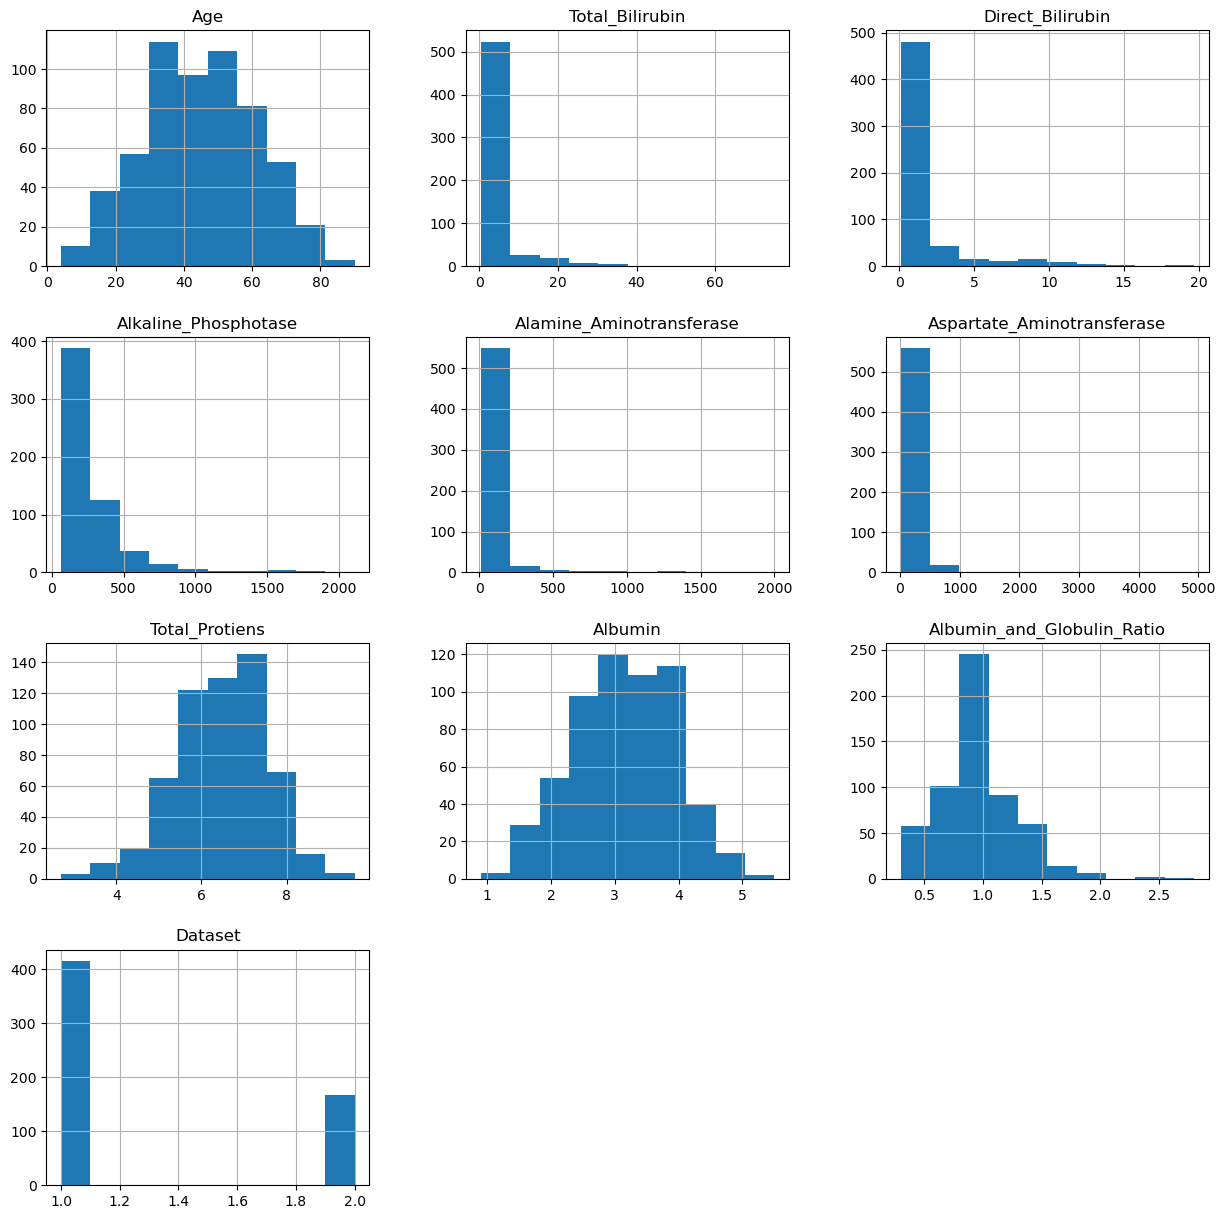

In [10]:
df.hist(figsize=(15,15), bins=10)
plt.show()

### 4.2 Feature Transformation

In [11]:
df['Dataset'] = df['Dataset'].map(lambda x: 0 if x == 2 else 1)

In [12]:
df['Gender'] = df['Gender'].map(lambda x: 0 if x == 'Male' else 1)

In [13]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### 4.3 Checking Feature Correlation Matrix

<Axes: >

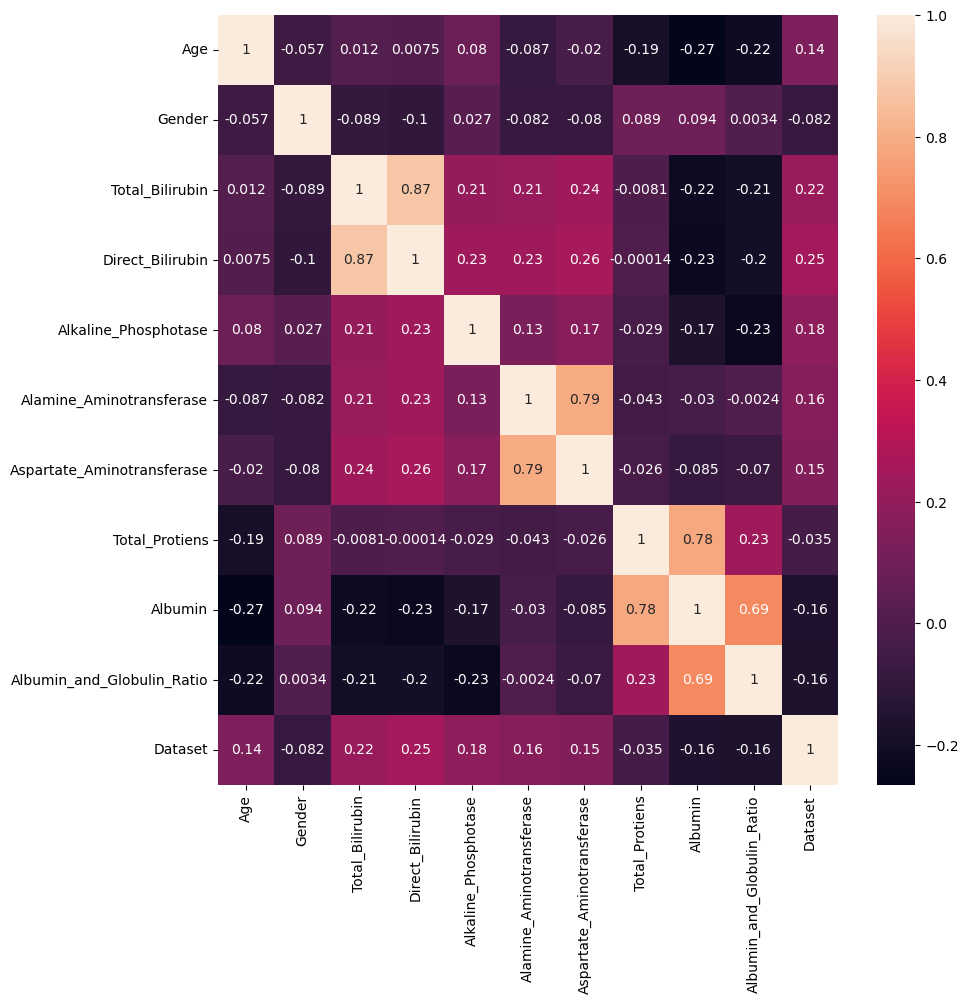

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### 4.4 Removing Data Duplicates

In [15]:
print("Before Removing Duplicates",df.shape)

df = df.drop_duplicates()
print("After Removing Duplicates",df.shape)

Before Removing Duplicates (583, 11)
After Removing Duplicates (570, 11)


In [16]:
df=df.dropna(how='any')  

### 4.5 Training and Testing Data Preparation

In [17]:
x = df.drop('Dataset', axis=1)

y = df["Dataset"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20,stratify=df.Dataset)

In [19]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(566, 10)
(452, 10)
(114, 10)
(566,)
(452,)
(114,)


### 4.6 Feature Scaling

In [20]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

# 5. Modelling

### 5.1 Model Training

In [21]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'KNN':KNeighborsClassifier()
}

In [22]:
model_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
roc_auc_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Specificity: {specificity}")
    print(f"ROC AUC Score: {roc_auc}")

    model_list.append(model_name)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

    print("=" * 50)

max_accuracy_index = test_accuracy_list.index(max(test_accuracy_list))
print(f"\nThe best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {test_accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy: 0.745575221238938
Testing Accuracy: 0.6754385964912281
Precision: 0.7115384615384616
Recall: 0.9135802469135802
F1 Score: 0.8
Specificity: 0.09090909090909091
ROC AUC Score: 0.5022446689113356
Model: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.5964912280701754
Precision: 0.7333333333333333
Recall: 0.6790123456790124
F1 Score: 0.7051282051282052
Specificity: 0.3939393939393939
ROC AUC Score: 0.5364758698092031
Model: Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.6929824561403509
Precision: 0.7555555555555555
Recall: 0.8395061728395061
F1 Score: 0.7953216374269005
Specificity: 0.3333333333333333
ROC AUC Score: 0.5864197530864197
Model: Support Vector Machine
Training Accuracy: 0.7367256637168141
Testing Accuracy: 0.7017543859649122
Precision: 0.7117117117117117
Recall: 0.9753086419753086
F1 Score: 0.8229166666666666
Specificity: 0.030303030303030304
ROC AUC Score: 0.5028058361391694
Model: Naive Bayes
Training Accuracy

In [30]:
results = {
    'Model': model_list,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall (Sensitivity)': recall_list,
    'F1 Score': f1_list,
    'Specificity': specificity_list,
    'ROC AUC Score': roc_auc_list
}

results = pd.DataFrame(results).sort_values(by=['Test Accuracy', 'Precision', 'Recall (Sensitivity)'], ascending=False)

results

,Model,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),F1 Score,Specificity,ROC AUC Score
6,XGB,1.000000,0.728070,0.790698,0.839506,0.814371,0.454545,0.647026
3,Support Vector Machine,0.736726,0.701754,0.711712,0.975309,0.822917,0.030303,0.502806
2,Random Forest,1.000000,0.692982,0.755556,0.839506,0.795322,0.333333,0.586420
0,Logistic Regression,0.745575,0.675439,0.711538,0.913580,0.800000,0.090909,0.502245
5,Gradient Boosting,0.938053,0.666667,0.741573,0.814815,0.776471,0.303030,0.558923
7,KNN,0.803097,0.649123,0.773333,0.716049,0.743590,0.484848,0.600449
4,Naive Bayes,0.542035,0.596491,0.972973,0.444444,0.610169,0.969697,0.707071
1,Decision Tree,1.000000,0.596491,0.733333,0.679012,0.705128,0.393939,0.536476


### 5.2 Hyperparamter Tuning

In [24]:
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Naive Bayes': {},
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5],
    },
    'XGB': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5],

    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

In [31]:
modelss = []
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []
roc_auc_scores = []

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)

        grid_search.fit(x_train, y_train)
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"\nBest parameters for {model_name}: {best_params}")

        y_train_pred = best_model_cv.predict(x_train)
        y_pred = best_model_cv.predict(x_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        roc_auc = roc_auc_score(y_test, y_pred)

        modelss.append(model_name)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        specificities.append(specificity)
        roc_auc_scores.append(roc_auc)

        print(f"Train Accuracy for {model_name}: {train_accuracy}")
        print(f"Test Accuracy for {model_name}: {test_accuracy}")
        print(f"Precision for {model_name}: {precision}")
        print(f"Recall for {model_name}: {recall}")
        print(f"F1 Score for {model_name}: {f1}")
        print(f"Specificity for {model_name}: {specificity}")
        print(f"ROC AUC Score for {model_name}: {roc_auc}")
        print("=" * 50)

best_test_accuracy_index = test_accuracies.index(max(test_accuracies))
print(f"We got {modelss[best_test_accuracy_index]} as the model with the highest test accuracy of {test_accuracies[best_test_accuracy_index]}")


Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy for Logistic Regression: 0.7433628318584071
Test Accuracy for Logistic Regression: 0.7017543859649122
Precision for Logistic Regression: 0.7238095238095238
Recall for Logistic Regression: 0.9382716049382716
F1 Score for Logistic Regression: 0.8172043010752689
Specificity for Logistic Regression: 0.12121212121212122
ROC AUC Score for Logistic Regression: 0.5297418630751963

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Accuracy for Decision Tree: 0.754424778761062
Test Accuracy for Decision Tree: 0.6666666666666666
Precision for Decision Tree: 0.7047619047619048
Recall for Decision Tree: 0.9135802469135802
F1 Score for Decision Tree: 0.7956989247311828
Specificity for Decision Tree: 0.06060606060606061
ROC AUC Score for Decision Tree: 0.4870931537598204

Best parameters for Random Forest: {'max_dep

In [37]:
results1 = {
    'Model': modelss,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall (Sensitivity)': recalls,
    'F1 Score': f1_scores,
    'ROC AUC Score': roc_auc_scores
}
results1 = pd.DataFrame(results1).sort_values(by=['Test Accuracy', 'Precision', 'Recall (Sensitivity)'], ascending=False)
results1

,Model,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),F1 Score,ROC AUC Score
3,Support Vector Machine,0.714602,0.710526,0.710526,1.000000,0.830769,0.500000
5,Gradient Boosting,0.745575,0.710526,0.710526,1.000000,0.830769,0.500000
6,XGB,0.714602,0.710526,0.710526,1.000000,0.830769,0.500000
0,Logistic Regression,0.743363,0.701754,0.723810,0.938272,0.817204,0.529742
2,Random Forest,1.000000,0.692982,0.750000,0.851852,0.797688,0.577441
1,Decision Tree,0.754425,0.666667,0.704762,0.913580,0.795699,0.487093
7,KNN,1.000000,0.622807,0.731707,0.740741,0.736196,0.537037
4,Naive Bayes,0.542035,0.596491,0.972973,0.444444,0.610169,0.707071


In [33]:
results1.to_csv("Liver_Evaluation_Metrics.csv")

### ROC AUC Curve Representation

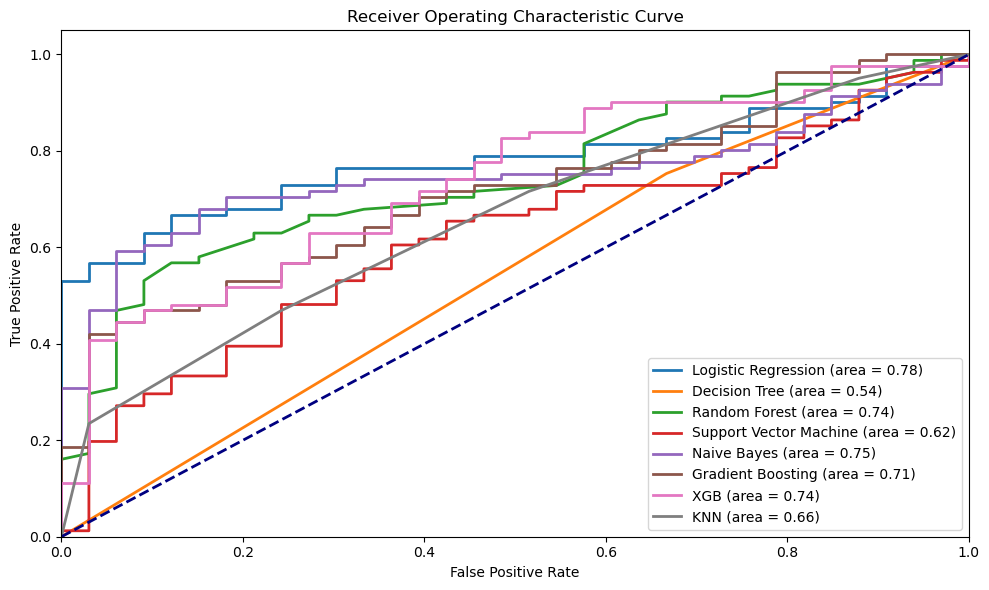

In [34]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))


fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    plot_roc_curve(ax, y_test, y_score, model_name)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic Curve')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [29]:
best_model = models['Logistic Regression']
pickle.dump(best_model, open('Liver_Model.pkl', 'wb'))
pickle.dump(scaler, open('Liver_Preprocessor.pkl', 'wb'))